# Instacart EDA Notebook

In this notebook, we do a high-level exploratory data analysis of our engineered Instacart dataset.

### Import libraries and modify notebook settings

In [1]:
# Import libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Modify notebook settings
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

### Create paths to data folders and files

In [2]:
# Create a variable for the project root directory
proj_root = os.path.join(os.pardir)

# Save the path to the folder that will contain the final,
# processed data: /data/processed
processed_data_dir = os.path.join(proj_root,
                                "data",
                                "processed")

# Save the path to final, processed Instacart data file.
final_csv_name = 'instacart_final.csv'

final_csv_path = os.path.join(processed_data_dir,
                              final_csv_name)

# Save the path to the folder that will contain 
# the figures for the final report:
# /reports/figures
figures_dir = os.path.join(proj_root,
                           "reports",
                           "figures")

### Read in data

In [3]:
df = pd.read_csv(final_csv_path, index_col=0)

### Explore the data

In [4]:
list(df.columns)

['y',
 'total_buy_n5',
 'total_buy_ratio_n5',
 'order_ratio_by_chance_n5',
 'useritem_order_days_max_n5',
 'useritem_order_days_min_n5']

In [5]:
df.head()

,y,total_buy_n5,total_buy_ratio_n5,order_ratio_by_chance_n5,useritem_order_days_max_n5,useritem_order_days_min_n5
up_pair,,,,,,
001-000196,1,5,1.0,1.0,30.0,0.0
001-010258,1,5,1.0,1.0,30.0,0.0
001-010326,0,0,0.0,0.0,83.0,83.0
001-012427,0,5,1.0,1.0,30.0,0.0
001-013032,1,2,0.4,0.4,34.0,19.0


### Check for null values

In [6]:
df.isnull().sum()

y                             0
total_buy_n5                  0
total_buy_ratio_n5            0
order_ratio_by_chance_n5      0
useritem_order_days_max_n5    0
useritem_order_days_min_n5    0
dtype: int64

### Check for correlation between variables

In [7]:
df.corr()

,y,total_buy_n5,total_buy_ratio_n5,order_ratio_by_chance_n5,useritem_order_days_max_n5,useritem_order_days_min_n5
y,1.000000,0.301751,0.301751,0.223214,-0.076630,-0.130569
total_buy_n5,0.301751,1.000000,1.000000,0.749122,-0.207975,-0.443379
total_buy_ratio_n5,0.301751,1.000000,1.000000,0.749122,-0.207975,-0.443379
order_ratio_by_chance_n5,0.223214,0.749122,0.749122,1.000000,-0.175133,-0.447793
useritem_order_days_max_n5,-0.076630,-0.207975,-0.207975,-0.175133,1.000000,0.816941
useritem_order_days_min_n5,-0.130569,-0.443379,-0.443379,-0.447793,0.816941,1.000000


In [8]:
df[['total_buy_n5', 'total_buy_ratio_n5']].corr()

,total_buy_n5,total_buy_ratio_n5
total_buy_n5,1.0,1.0
total_buy_ratio_n5,1.0,1.0


`total_buy_ratio_n5` is a linear combination of `total_buy_n5`. Therefore, we drop `total_buy_ratio_n5` from our feature set.

In [9]:
df = df.drop('total_buy_ratio_n5', axis=1)

### Check if the target variable is balanced

In [10]:
df['y'].value_counts(normalize=True, ascending=False)

0    0.93772
1    0.06228
Name: y, dtype: float64

The target is quite unbalanced, with only 6% reorders.

### Visualize the distribution of each feature

In [11]:
list(df.columns)

['y',
 'total_buy_n5',
 'order_ratio_by_chance_n5',
 'useritem_order_days_max_n5',
 'useritem_order_days_min_n5']

In [12]:
df['total_buy_n5'].value_counts(normalize=True,
                                ascending=False)

0    0.495471
1    0.358921
2    0.086291
3    0.035260
4    0.016371
5    0.007686
Name: total_buy_n5, dtype: float64

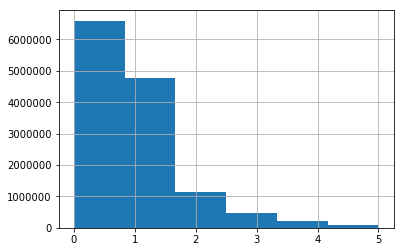

In [13]:
df['total_buy_n5'].hist(bins=df['total_buy_n5'].value_counts().count())

In [14]:
df['order_ratio_by_chance_n5'].value_counts(normalize=True,
                                            ascending=False)

0.000000    0.495471
0.200000    0.128801
1.000000    0.091449
0.500000    0.071898
0.333333    0.057723
0.400000    0.049827
0.250000    0.046362
0.600000    0.025274
0.800000    0.014138
0.666667    0.014024
0.750000    0.005032
Name: order_ratio_by_chance_n5, dtype: float64

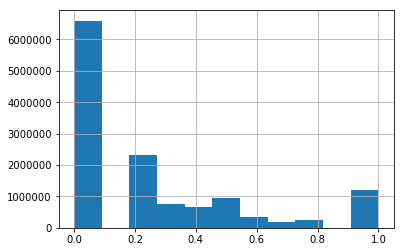

In [15]:
df['order_ratio_by_chance_n5'].hist(bins=df['order_ratio_by_chance_n5']
                                    .value_counts().count())

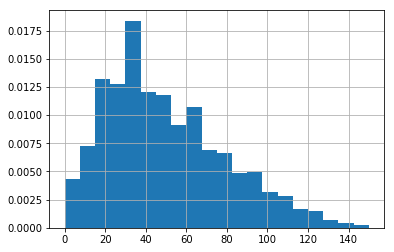

In [16]:
df['useritem_order_days_max_n5'].hist(bins=20, normed=True)

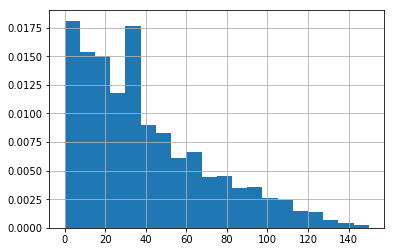

In [17]:
df['useritem_order_days_min_n5'].hist(bins=20, normed=True)

## Bivariate Visualizations
Visualize how the proportion of reorders varies with each feature

In [18]:
def create_bivariate_plot(feature_col):
    
    # Plot the proportion of reorders by feature_col values
    my_df = df.groupby([feature_col,
                        'y']).size().unstack()

    # Calculate proportions
    my_df = my_df.div(my_df.sum(axis=1), axis='index')

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    my_colors = ['0.3']

    ax.scatter(x=my_df.index,
               y=my_df[1], 
               color=my_colors)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 

    plt.title('Proportion of Reorders\nby "{}"'.format(feature_col),
              fontsize=20)
    plt.ylabel('Proportion of Reorders', fontsize=14)
    plt.xlabel('"{}"'.format(feature_col), fontsize=14)

    # figure file_name
    fig_file_name = 'EDA_Reorders_by_useritem_order_days_min_n5'
    fig_file_name = 'EDA_Reorders_by_{}'.format(feature_col)
    
    # figure file_path
    fig_path = os.path.join(figures_dir, fig_file_name)

    plt.tight_layout()
    plt.subplots_adjust(top=0.80)

    # Save the figure
    plt.savefig(fig_path, dpi = 300)

    plt.show()    

### Plot the how the proportion of reorders varies with total_buy_n5

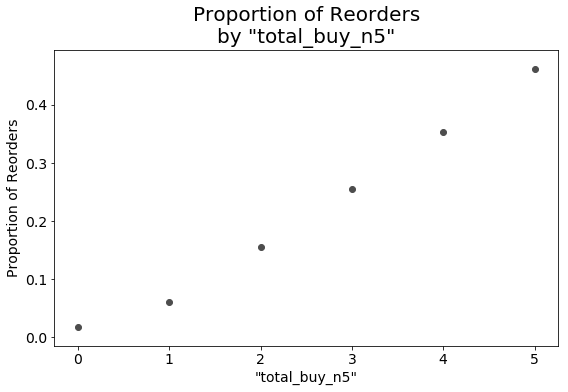

In [19]:
create_bivariate_plot('total_buy_n5')

### Plot the how the proportion of reorders varies with order_ratio_by_chance_n5

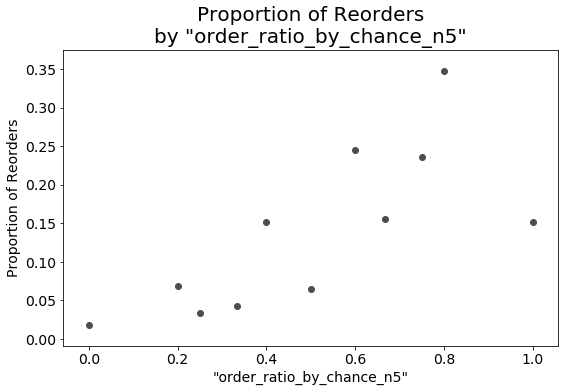

In [20]:
create_bivariate_plot('order_ratio_by_chance_n5')

### Plot the how the proportion of reorders varies with useritem_order_days_max_n5

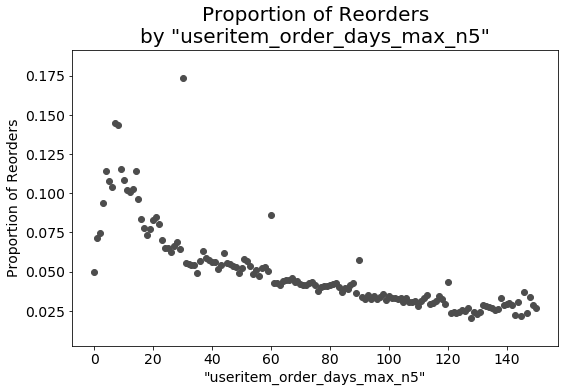

In [21]:
create_bivariate_plot('useritem_order_days_max_n5')

### Plot the how the proportion of reorders varies with useritem_order_days_min_n5

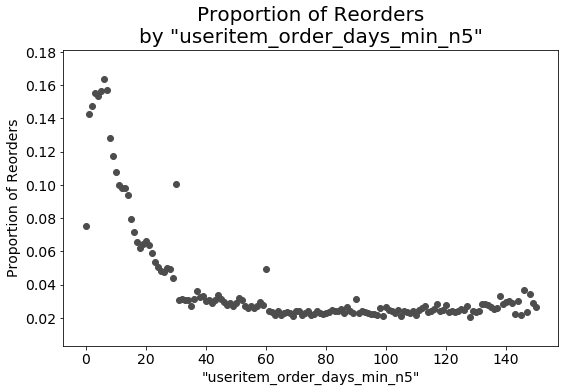

In [22]:
create_bivariate_plot('useritem_order_days_min_n5')